## 1. Principal Component Analysis (PCA)

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

PCA en yaygın kullanılan Boyut Azaltma Tekniklerinden (Dimensionality Reduction) biridir.

Temel olarak datayı Orthogonal Subspace'lere yansıtarak data içindeki en önemli değişkenleri bulmamızı sağlar.

Böylece önemsiz değişkenleri kolayca eleyebiliriz. Bu eleme işi bizim datamızdaki boyut sayısını azaltacağı için bu işleme literatürde `Dimensionality Reduction` denir.

PCA, datayı yüksek boyutlu uzaydan alıp daha düşük bouytlu uzaya yansıtır. Bu yansıtmada data içindeki **en yüksek varyansı** sağlayan değişkenleri kullanır.

En yüksek varyansı veren değişkenler datayı en iyi temsil eden değişkenlerdir.

PCA tarafından seçilen, en yüksek varyansa sahip değişkenlere **Principal Components** denir.

İlk Principal Component, en yüksek varyansa sahip olandır.

Principal Component'ler `Eigenvalue Decomposition` ile bulunur.

**Eigenvalue Decomposition** birbiri ile ilgisi olmayan ve data matrisini tanımlayan vektörler kümesi oluşturur.

Bu vektörler de aslında Principal Component'lerdir.

<img src='images/pca_1.png' />

<img src='images/pca_2.gif' />

### PCA Örnekleri:

#### PCA Örnek 1: Iris Dataset

Scikit-Learn kullanarak Iris Dataset üzerinde PCA yapalım:

In [1]:
# kütüphaneleri import edelim

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')

from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
# Dataset'i yükleyelim

iris = datasets.load_iris()
X = iris.data
y = iris.target

PCA çalıştırmadan önce, dataset'i 3D olarak görelim:

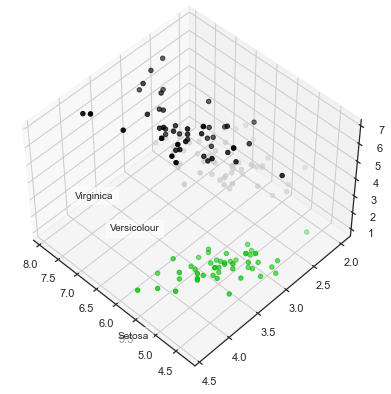

In [3]:
fig = plt.figure(1, figsize=(6, 5))

plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    
# Label'ların sırasını aynı yapalım
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, 
           cmap=plt.cm.nipy_spectral)

plt.show()

Şimdi PCA yapmadan tek bir model (DecisionTreeClassifier) ile tahmin yapalım:

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

X_train.shape

(105, 4)

Girdi matrisimiz (X_train) 4 adet değişkenden (feature) oluşmakta.

In [5]:
# Decision tree, max_depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# modeli fit edelim
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
# tahmin oranları
preds = clf.predict_proba(X_test)

print(preds)

[[0.         0.05555556 0.94444444]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02941176]
 [0.         0.05555556 0.94444444]
 [0.         0.05555556 0.94444444]
 [0.         0.05555556 0.94444444]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02941176]
 [1.         0.         0.        ]
 [0.         0.05555556 0.94444444]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.05555556 0.94444444]
 [0.         0.05555556 0.94444444]
 [1.         0.         0.        ]
 [0.         0.05555556 0.94444444]
 [0.         0.97058824 0.02941176]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.97058824 0.02941176]
 [1.         0.         0.        ]
 [0.         0.97058824 0.02941176]
 [0.         0.05555556 0.94444444]
 [0.         0.05555556 0.94444444]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02941176]
 [0.         0.97058824 0.02

In [7]:
# accuracy - PCA olmadan

y_pred = clf.predict(X_test)

print('PCA Olmadan Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

PCA Olmadan Accuracy: 0.89


Gördüğünüz gibi 4 değişken ile model kurduğumuzda accuracy değeri: %89 oldu.

Şimdi PCA ile değişken sayısını azaltalım ve tekrar deneyelim:

In [8]:
# sklearn'den PCA alalım
pca = decomposition.PCA(n_components=2)
pca

PCA(n_components=2)

Bütün girdi matrisimiz olan X'i center'layalım.

**Center**'lamak demek her bir data noktasından **Mean (ortalama)** değerini çıkarmak demek.

Böylece datamız 0 etrafında merkezlenmiş olur.

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
X.mean()

3.4644999999999997

In [11]:
# X'i merkezle
X_centered = X - X.mean(axis=0)

X_centered

array([[-7.43333333e-01,  4.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01, -5.73333333e-02, -2.35800000e+00,
        -9.99333333e-01],
       [-1.14333333e+00,  1.42666667e-01, -2.45800000e+00,
        -9.99333333e-01],
       [-1.24333333e+00,  4.26666667e-02, -2.25800000e+00,
        -9.99333333e-01],
       [-8.43333333e-01,  5.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-4.43333333e-01,  8.42666667e-01, -2.05800000e+00,
        -7.99333333e-01],
       [-1.24333333e+00,  3.42666667e-01, -2.35800000e+00,
        -8.99333333e-01],
       [-8.43333333e-01,  3.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.44333333e+00, -1.57333333e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01,  4.26666667e-02, -2.25800000e+00,
        -1.09933333e+00],
       [-4.43333333e-01,  6.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.04333333e+00,  3.42666667e-01, -2.15800000e+00,
      

In [12]:
X_centered.shape

(150, 4)

In [13]:
# şimdi PCA'i fit edelim

pca.fit(X_centered)

# X_centered datamızı PCA'ye verip dönüştürelim

X_pca = pca.transform(X_centered)
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [14]:
# PCA sonucunda data 4 boyuttan 2 boyuta düştü

X_pca.shape

(150, 2)

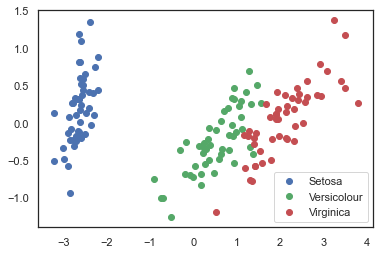

In [15]:
# PCA sonuçlarının grafiğini çizelim

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')

plt.legend(loc=0)
plt.show()

Gördüğünüz gibi şimdi data artık 2 boyutlu ve 2D olduğu için de kolayca grafiğini çizdik.

2 boyutlu olmasının sebebi, bizim PCA'yı yaratırken `n_components=2` şeklinde vermemiz.

Şimdi PCA yapılmış data ile tekrar model kuralım ve tahmin yapalım:

In [16]:
# Train, test split -> X_pca

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [17]:
# Decision tree, max_depth = 2
clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)

# modeli fit edelim
clf_pca.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [19]:
# accuracy - PCA olmadan

y_pred_pca = clf_pca.predict(X_test)

print('PCA ile Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_pca)))

PCA ile Accuracy: 0.91


Gördüğünüz gibi PCA ile accuracy değeri %91'e çıktı.

PCA'nın bir diğer faydası da şu oldu:
* Data içindeki boyut azaldığı için yüksek veri adetlerinde model çok daha hızlı çalışır.

**PCA Analizi:**

Şimdi yaptığımız PCA modelin;
* bize hangi Principal Component'leri verdiğini 
* onların data içindeki toplam variance'ın yüzde kaçını açıkladığını

görelim:

In [20]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [28]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [27]:
for i, component in enumerate(pca.components_):
    print("{}. component: {}% variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))

1. component: 92.46% variance
2. component: 5.31% variance


Görüldüğü gibi iki Principal Component, data içindeki toplam variance'ın %97'sini açıklıyorlar.

Yani son derece iyi bir şekilde datayı bu iki Component tek başına temsil ediyor.

Diğer değişkenlere bakmaya bile gerek yok bu data set için.

#### PCA Örnek 2: MNIST - El Yazısı Rakamları

Bu örnekte de elle yazılmış rakamları tahmin etmek için PCA yaklaşımını görelim:

In [29]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [30]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
y

array([0, 1, 2, ..., 8, 9, 8])

Datayı biraz görselleştirelim.

Datamız 0-9 rakamlarının siyah-beyaz resimleri.

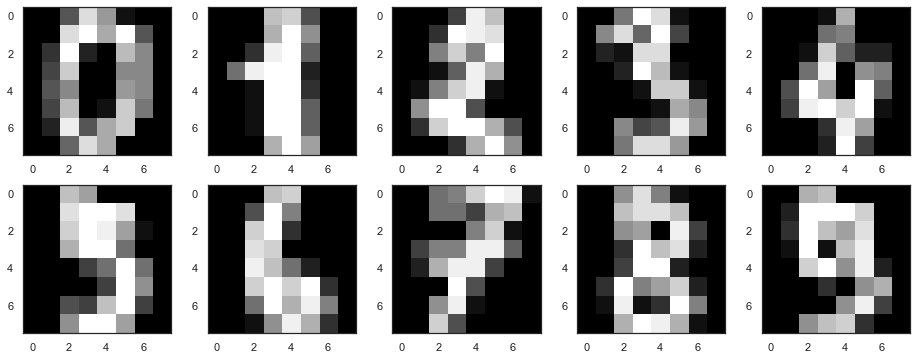

In [33]:
plt.figure(figsize=(16, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');
    

In [34]:
X.shape

(1797, 64)

Datamızın 64 boyutu var.

In [35]:
# sadece 1 data noktasına bakalım

X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Her bir data noktası yani her bir rakam 8x8 pixellik bir alanda çizilmiştir.

Dolayısı ile her bir resmin boyutu 8*8 = 64'tür.

Her bir data noktası bu 64 adet pixelin arkaya arkaya yazılması ile oluşturulmuştur. (flatten edilmiş - düzleştirilmiş)

Her bir index'teki sayılar da 0-255 arasında bir değeri gösterir.
* 0 -> tam siyah
* 255 -> tam beyaz

**PCA'in faydası:**

Datamız 64 boyutlu yani boyut sayısı fazla.

PCA ile boyut sayısını 2 yapacağız.

Böylece data hem görsel olarak çizilebilir ve ayrılabilir olacak hem de işlemlerimiz çok hızlı olacak.

In [45]:
X.shape

(1797, 64)

In [38]:
# PCA nesnesi yaratalım
pca = decomposition.PCA(n_components=2)

# data boyutunu düşürelim
X_reduced = pca.fit_transform(X)

print('%d-boyutlu data 2 boyutlu uzaya yansıtıldı (projecting).' % X.shape[1])

64-boyutlu data 2 boyutlu uzaya yansıtıldı (projecting).


In [43]:
X_reduced

array([[ -1.25945943,  21.27488628],
       [  7.95761798, -20.76869833],
       [  6.99192455,  -9.9559832 ],
       ...,
       [ 10.80128314,  -6.96025137],
       [ -4.87204522,  12.42397995],
       [ -0.34440567,   6.36554439]])

In [44]:
X_reduced.shape

(1797, 2)

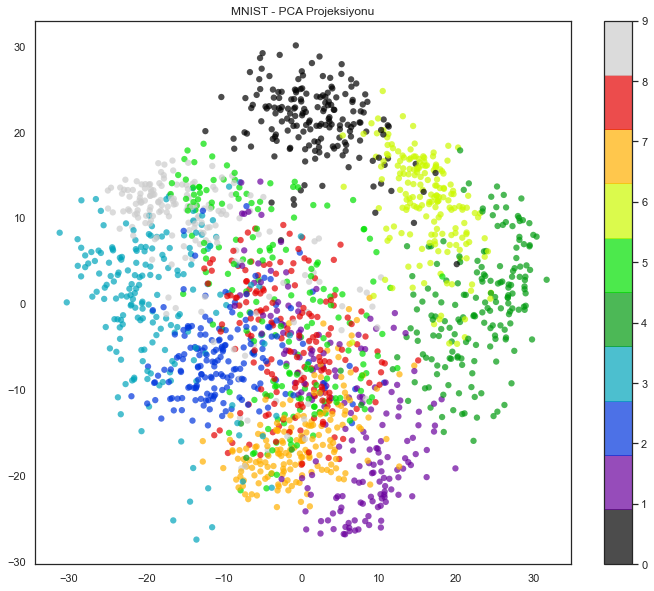

In [42]:
# şimdi 2D'de çizelim

plt.figure(figsize=(12,10))

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()

plt.title('MNIST - PCA Projeksiyonu');

Görüldüğü gibi 2 bouytlu düzlemde datamız görselleştirilebilir oldu.

**PCA'in Gerçek Hayatta Kullanımı**:

Gerçek hayat problemlerinde PCA yapılırken, genelde component sayısı önden verilmez, bunun yerine toplam variance'in yüzde kaçını açıklayacak component'ler seçilir.

Örneğin denir ki: Toplam variance'ın %80'ini anlatan component'ler bizim için yeterli.

İşte bu şekilde Principal Component'ler belirlenmiş olur.

NNIST örneğimizde, biz de diyelim ki, toplam variance'ın %90'ını anlatan componentleri bulmak istiyoruz. (explained_variance_ratio_)

Tahminimizi o component'ler ile yapacağız:

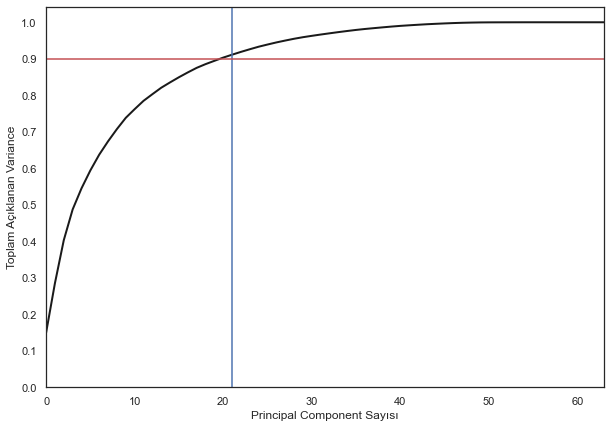

In [47]:
# PCA ile toplam açıklanan variance'ı çizelim

pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Principal Component Sayısı')
plt.ylabel('Toplam Açıklanan Variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show();

Görüldüğü gibi 21 adet değişken ile (Principal Component'ler) toplam variance'ın %90'ı açıklamış oluyor.

Dolayısı ile artık 64 değişken ile değil, sadece 21 değişken ile bir model kurup hemen hemen aynı doğrulukta tahminler yapabilir.

Yani tahmin kalitesinden pek birşey kaybetmedik (max %10) ama performans'tan çok ciddi oranda kazanım elde ettik.

`Böylece Boyut Azaltmış olduk.`